In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [133]:
df=pd.read_csv("multiple_linear_regression.csv")

In [134]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [135]:
df.isna().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

In [136]:
df.describe()

,Feature 1,Feature 2,Feature 3,Target
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [137]:
df.dtypes

Feature 1    float64
Feature 2    float64
Feature 3    float64
Target       float64
dtype: object

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [139]:
df.sample(10)

,Feature 1,Feature 2,Feature 3,Target
48,227.2,15.8,49.9,14.8
104,238.2,34.3,5.3,20.7
93,250.9,36.5,72.3,22.2
41,177.0,33.4,38.7,17.1
133,219.8,33.5,45.1,19.6
121,18.8,21.7,50.4,7.0
188,286.0,13.9,3.7,15.9
193,166.8,42.0,3.6,19.6
198,283.6,42.0,66.2,25.5
177,170.2,7.8,35.2,11.7


<Axes: xlabel='Feature 1', ylabel='Target'>

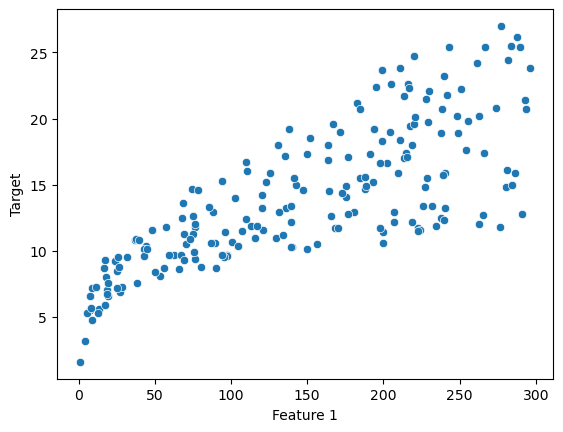

In [140]:
sns.scatterplot(x="Feature 1",y="Target",data=df)

In [ ]:
sns.regplot(x="Feature 1",y="Target",data=df,color="r")

In [ ]:
sns.scatterplot(x="Feature 2",y="Target",data=df,markers=True)

In [ ]:
sns.scatterplot(x="Feature 3",y="Target",data=df)

In [ ]:
df.corr()

In [ ]:
x = df.iloc[:, df.columns != "Target"]


In [ ]:
y=df[["Target"]]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.30, random_state = 43)

In [ ]:
len(x_train)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
mlr=LinearRegression()
mlr.fit(x_train,y_train)

In [ ]:
mlr.coef_

In [ ]:
mlr.intercept_

In [ ]:
test_predictions=mlr.predict(x_test)

In [ ]:

plt.plot(x_test,y_test,"*",color="green")
plt.plot(x_test,test_predictions,"x",color="red")
   

In [ ]:
from sklearn.metrics import mean_squared_error
cost=mean_squared_error(test_predictions,y_test)
cost

In [ ]:
mlr.score(x_test,y_test)

In [ ]:
for i in range(len(y_test)):
    print(f"prediction={test_predictions[i]} actual={np.array(y_test)[i]}")
    
